# Gambler's Problem

In [105]:
stakes = [0,]*101
stakes[100] = 1
p_h = 0.4
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [106]:
while True:
    delta = 0
    for capital in tqdm(range(1, 100)):
        v = stakes[capital]
        stakes[capital] = 0
        for stake in range(1, capital+1):
            if capital+stake >= 100:
                stakes[capital] += p_h
            else:
                stakes[capital] += p_h*stakes[capital+stake]
            if capital-stake > 0:
                stakes[capital] += (1-p_h)*stakes[capital-stake]
        stakes[capital]/=capital
        delta = max(delta, abs(v-stakes[capital]))
    if delta < 1e-6:
        break

100%|████████████████████████████████████████| 99/99 [00:00<00:00, 46734.51it/s]


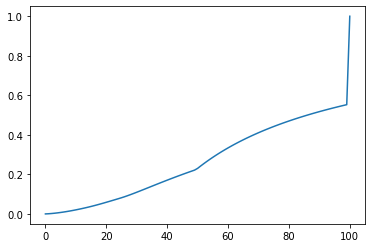

In [107]:
plt.plot(np.arange(101),stakes)

In [108]:
pi = [0,]*100

In [109]:
while True:
    stable = True
    for capital in tqdm(range(1, 100)):
        action = pi[capital]
        q_a = dict()
        for stake in range(1, capital+1):
            q_a[stake] = 0
            if capital+stake >= 100:
                q_a[stake] += p_h
            else:
                q_a[stake] += p_h*stakes[capital+stake]
            if capital-stake > 0:
                q_a[stake] += (1-p_h)*stakes[capital-stake]
        pi[capital] = sorted(q_a.items(), key = lambda x : x[1], reverse=True)[0][0]
        if action != pi[capital]:
            stable = False
    if not stable:
        while True:
            delta = 0
            for capital in tqdm(range(1, 100)):
                v = stakes[capital]
                stakes[capital] = 0
                stake = pi[capital]
                if capital+stake >= 100:
                    stakes[capital] += p_h
                else:
                    stakes[capital] += p_h*stakes[capital+stake]
                if capital-stake > 0:
                    stakes[capital] += (1-p_h)*stakes[capital-stake]
                delta = max(delta, abs(v-stakes[capital]))
            if delta < 1e-6:
                break
    else:
        break

100%|████████████████████████████████████████| 99/99 [00:00<00:00, 56733.99it/s]


$p_h=0.4$

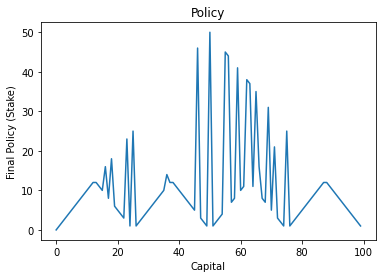

In [56]:
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.show()

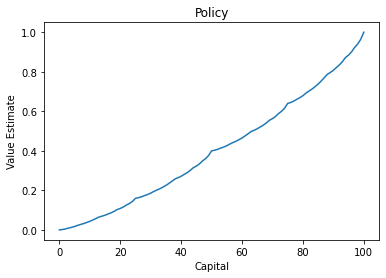

In [57]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

$p_h=0.25$

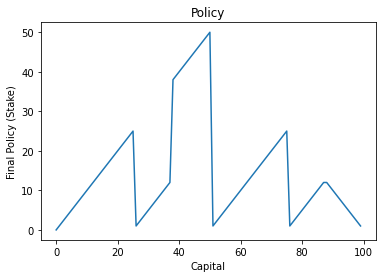

In [63]:
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.show()

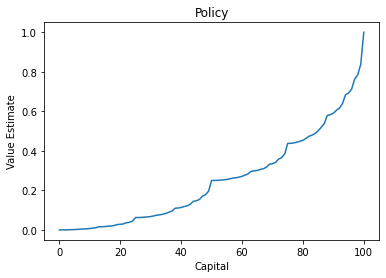

In [64]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

$p_h=0.55$

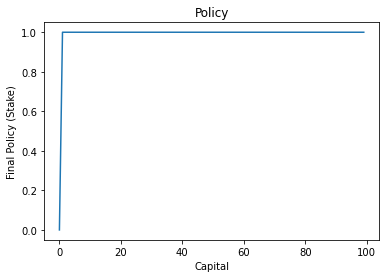

In [91]:
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.show()

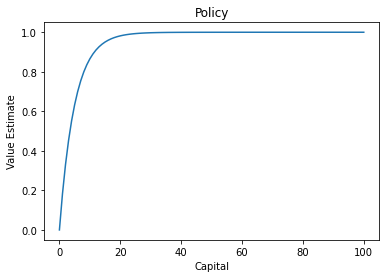

In [97]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

$p_h=0.5$

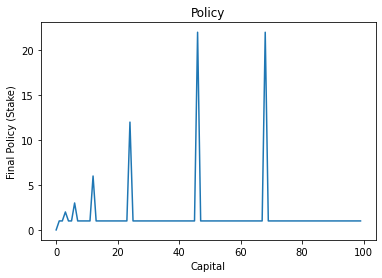

In [103]:
plt.plot(np.arange(100), pi)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Final Policy (Stake)')
plt.show()

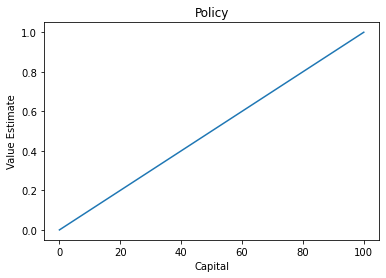

In [104]:
plt.plot(np.arange(101), stakes)
plt.title('Policy')
plt.xlabel('Capital')
plt.ylabel('Value Estimate')
plt.show()

In [137]:
import random
game_over = False
capital = 50
while not game_over:
    stake = pi[capital]
    roll = random.random()
    print(capital, stake, end=' ')
    if roll < p_h:
        capital += stake
        print('Yay')
    else:
        capital -= stake
        print('Ooof')
    if capital <= 0:
        print('Lost')
        game_over = True
    elif capital >= 100:
        print('Won')
        game_over = True

50 50 Ooof
Lost
